Задача 1
1. Скачать данные
1. Изучите стоимости недвижимости
1. Изучите распределение квадратуры жилой 
1. Изучите распределение года постройки

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1.1

In [10]:
df = pd.read_csv('kc_house_data.csv', encoding='latin-1')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# 1.2

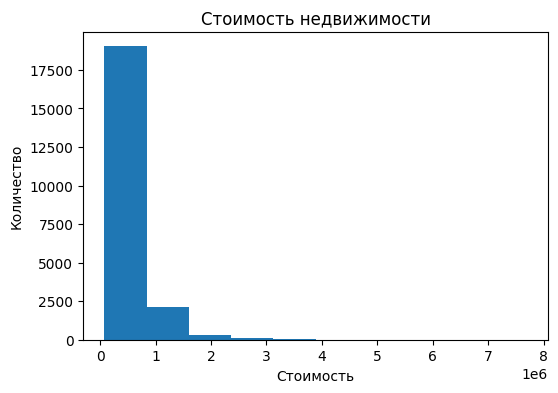

In [3]:
plt.figure(figsize = (6,4))
plt.hist(df['price'], bins = 10)
plt.xlabel('Стоимость')
plt.ylabel('Количество')
plt.title('Стоимость недвижимости');

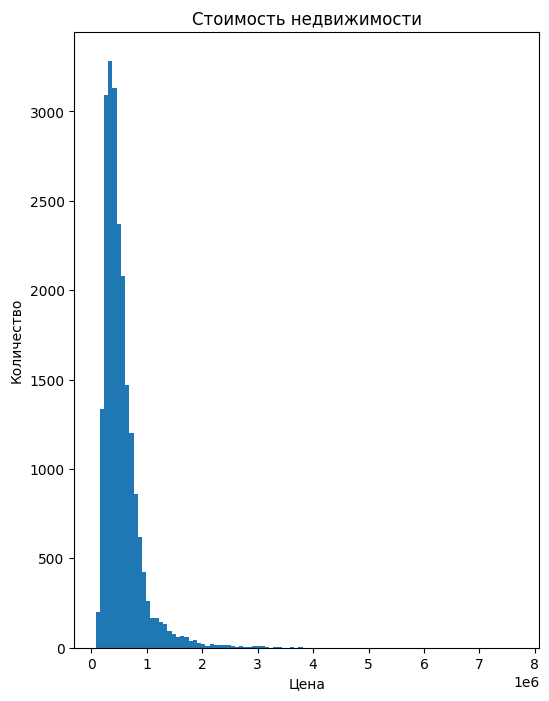

In [4]:
plt.figure(figsize=(6,8))

plt.hist(df['price'], bins=100)
plt.title('Стоимость недвижимости')
plt.xlabel('Цена')
plt.ylabel('Количество');

*Вывод:*
1. Колличество домов прямопропорционально их цене
2. Максимальное количество недвижимости продается по цене до ~700 000-1 000 000 д.е., основная часть недвижимости продается по цене до 2 000 000 д.е.

# 1.3

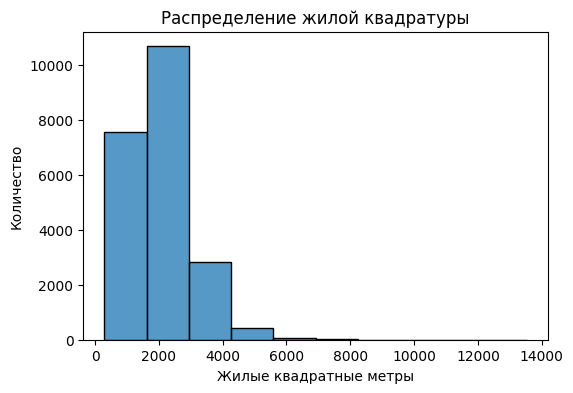

In [6]:
plt.figure(figsize = (6,4))
sns.histplot(df['sqft_living'], bins = 10)
plt.xlabel('Жилые квадратные метры')
plt.ylabel('Количество')
plt.title('Распределение жилой квадратуры');

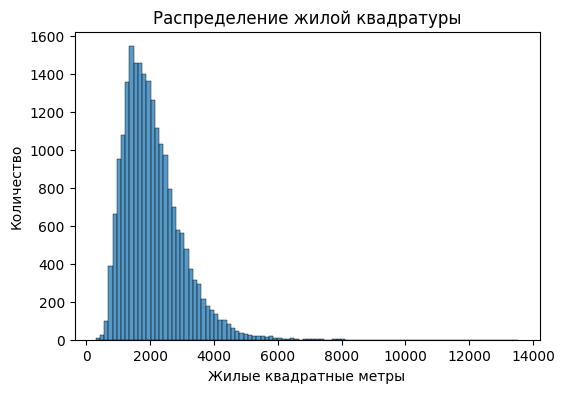

In [5]:
plt.figure(figsize = (6,4))
sns.histplot(df['sqft_living'], bins = 100)
plt.xlabel('Жилые квадратные метры')
plt.ylabel('Количество')
plt.title('Распределение жилой квадратуры');

*Вывод:*
Максимальное количество недвижимости продается с жилой площадью от 1700 до 2300 кв. м, основная часть недвижимости продается с жилой площадью от 500 до 6000 кв. м.

# 1.4

In [9]:
data_yr= df['yr_built'].value_counts()
data_yr

yr_built
2014    559
2006    454
2005    450
2004    433
2003    422
       ... 
1933     30
1901     29
1902     27
1935     24
1934     21
Name: count, Length: 116, dtype: int64

In [ ]:
years_list = [1900+i*10 for i in range (0,13)]

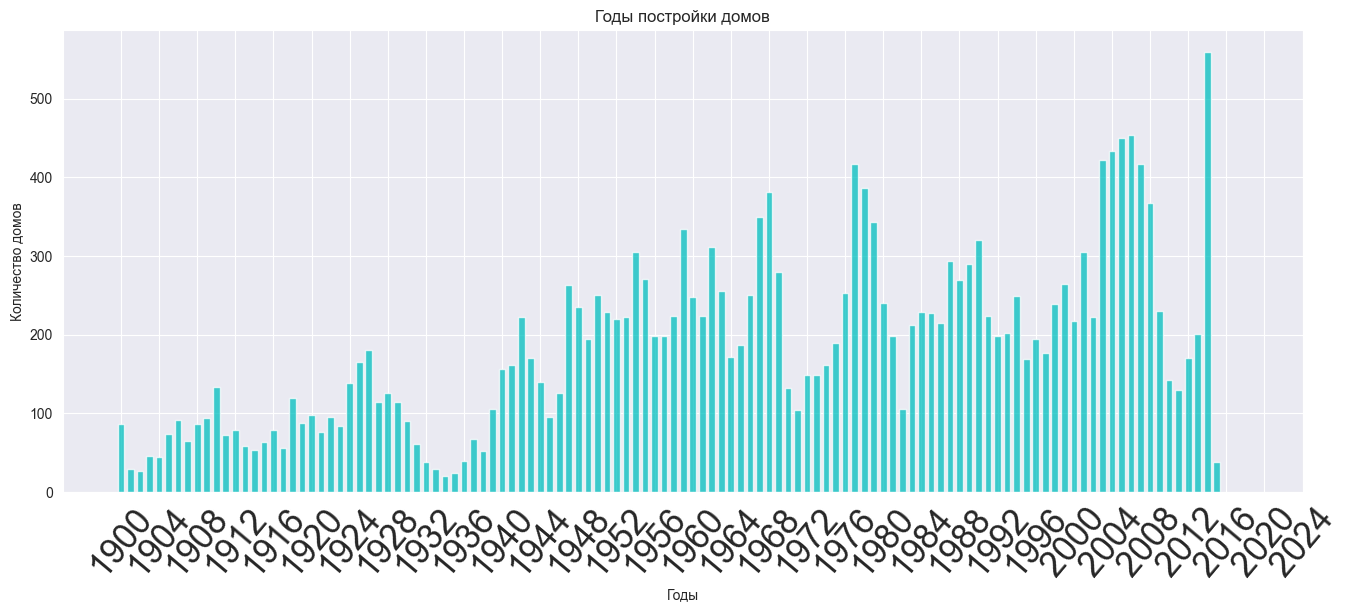

In [12]:
names = data_yr.index
values = data_yr.values
yr_list = list(range(1900,2025,4))
plt.figure(figsize=(16, 6))
plt.bar(names,values, width=0.7, facecolor='c', alpha=0.75)
plt.title('Годы постройки домов')
plt.xlabel('Годы')
plt.ylabel('Количество домов')
plt.grid(True)
plt.xticks(yr_list,rotation=50);
plt.show()


*Вывод:*
Меньше всего строили в 1930-ых годах, 1970-ых. Всплески строительства наблюдаются в конце 1960-ых, 1970-ых и 2000-ых.

Задача 2
1. Изучите распределение домов от наличия вида на набережную.
Постройте график, сделайте вывод.
1. Изучите распределение этажей домов
1. Изучите распределение состояния домов

# 2.1

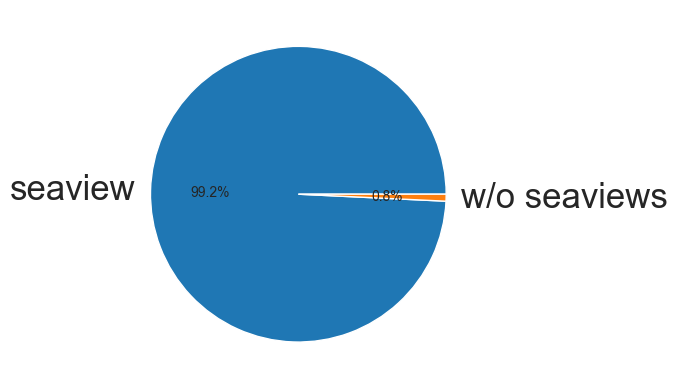

In [13]:
data_view = df['waterfront'].value_counts()
val = data_view.values
plt.pie(val,labels=['seaview', 'w/o seaviews'], autopct='%.1f%%'); 

*Вывод:* всего лишь 0,8% всей недвижимости продается с видом на набережную.

# 2.2

In [14]:
df.floors.max(), df.floors.min()

(3.5, 1.0)

In [17]:
data2 = df['floors'].value_counts(normalize=True)*100
data2

floors
1.0    49.414704
2.0    38.129829
1.5     8.837274
3.0     2.836256
2.5     0.744922
3.5     0.037015
Name: proportion, dtype: float64

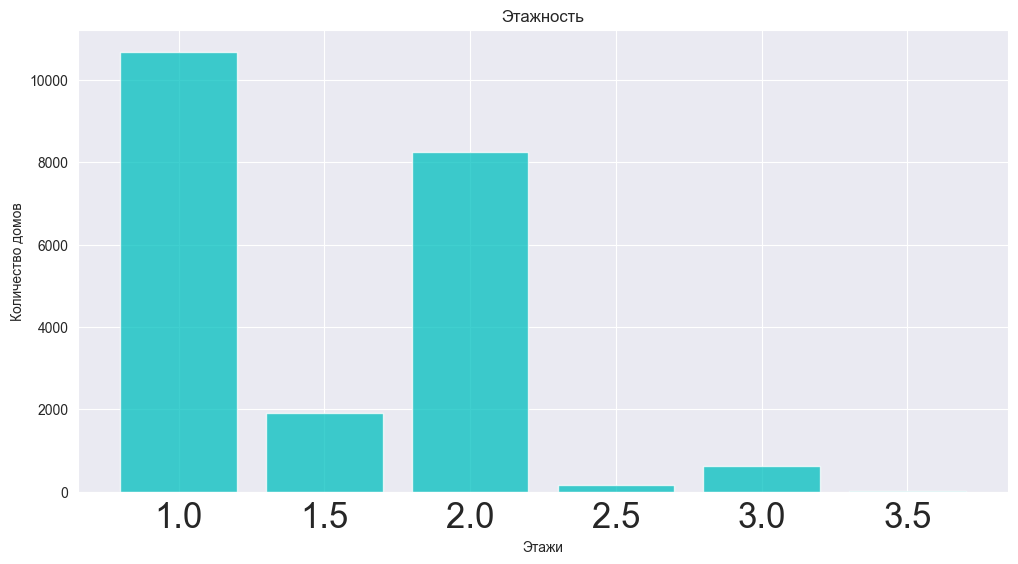

In [18]:
data_floor = df['floors'].value_counts()
f_val = data_floor.values
f_ind = data_floor.index
plt.figure(figsize=(12, 6))
plt.bar(f_ind,f_val, width=0.4, facecolor='c', alpha=0.75)
plt.title('Этажность')
plt.xlabel('Этажи')
plt.ylabel('Количество домов')
plt.grid(True)
plt.show()

*Вывод:*
1. Большая часть домов состоит из 1 и 2 этажей.
2. Одноэтажные дома лидируют по продаже недвижимости в 49,4%.
3. Минимальная доля продажи приходится на 2,5-этажные и 3,5-этажные дома (0,74%, 0,04%).

# 2.3

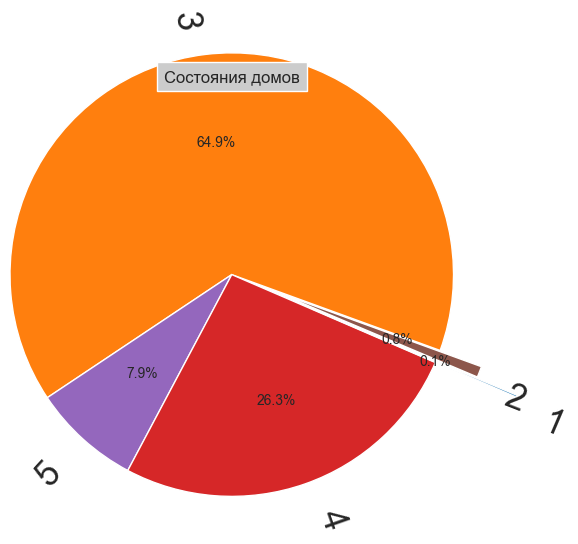

In [19]:
data_cond = df['condition'].value_counts(sort=False)
data_cond
cond_val= data_cond.values
cond_ind = data_cond.index
cond_explode = [0,0,0,0.6,0.3]
colors = ["#ff7f0e", "#9467bd", "#d62728","#1f77b4", "#8c564b"]
plt.title("Состояния домов")
plt.pie(cond_val, labels=cond_ind, radius = 1.5,
        startangle=-20, colors=colors,
        rotatelabels=True, explode = cond_explode,
        labeldistance=1.1, autopct='%.1f%%')
plt.title("Состояния домов", bbox={'facecolor':'0.8', 'pad':5})
plt.show;

*Вывод:* менее 1% в плохом состоянии, около 2/3 в среднем состоянии.

Задача 3

Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.  

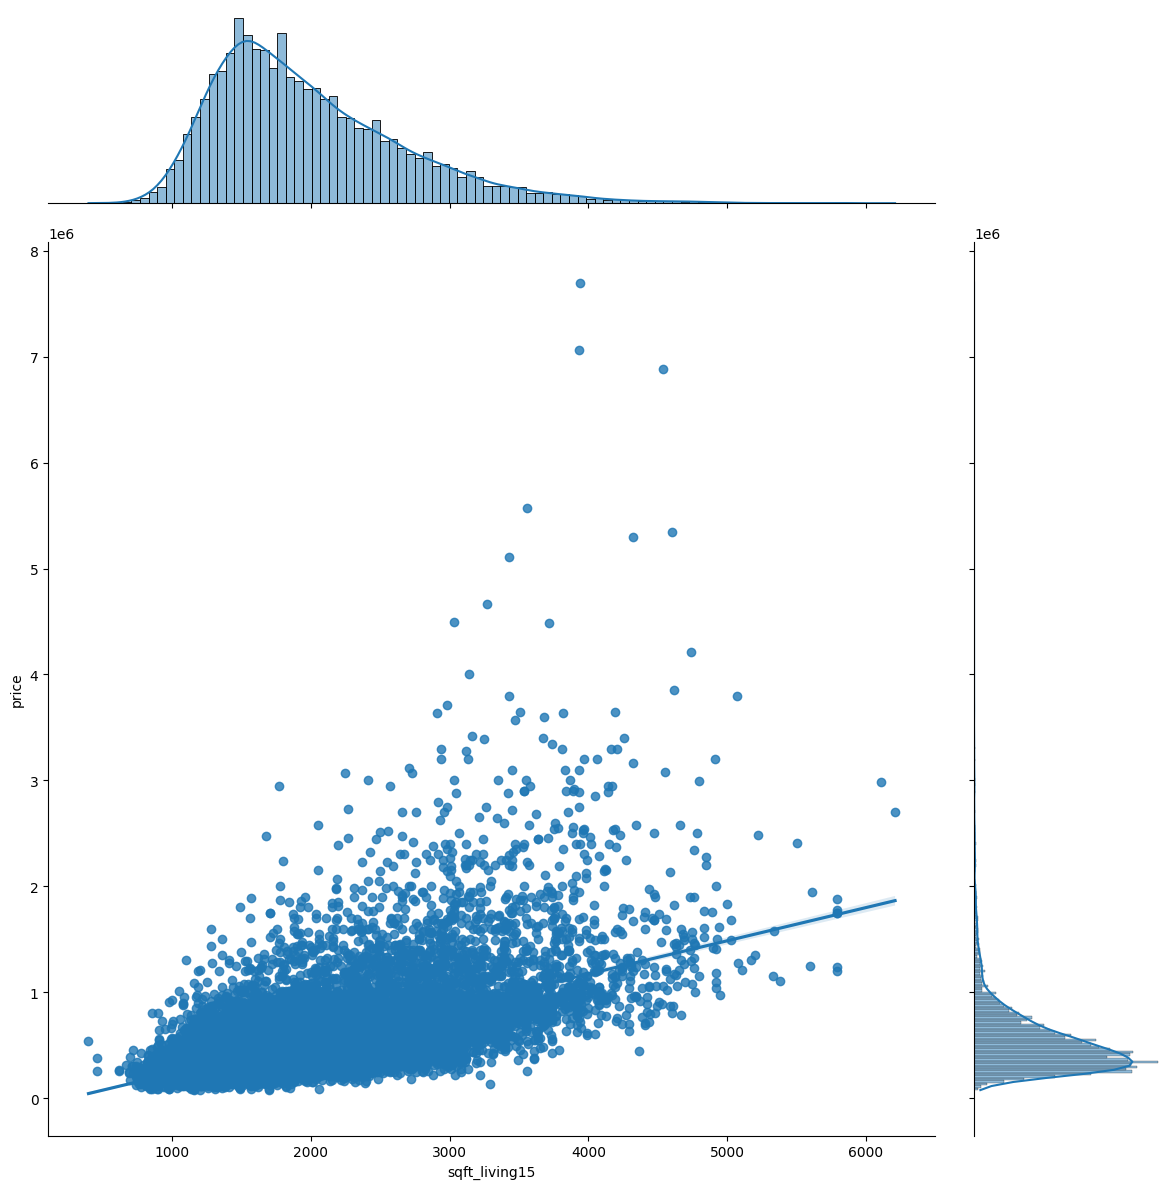

In [22]:
sns.jointplot(data=df, x="sqft_living15", y="price", kind="reg", height=12, ratio=4);

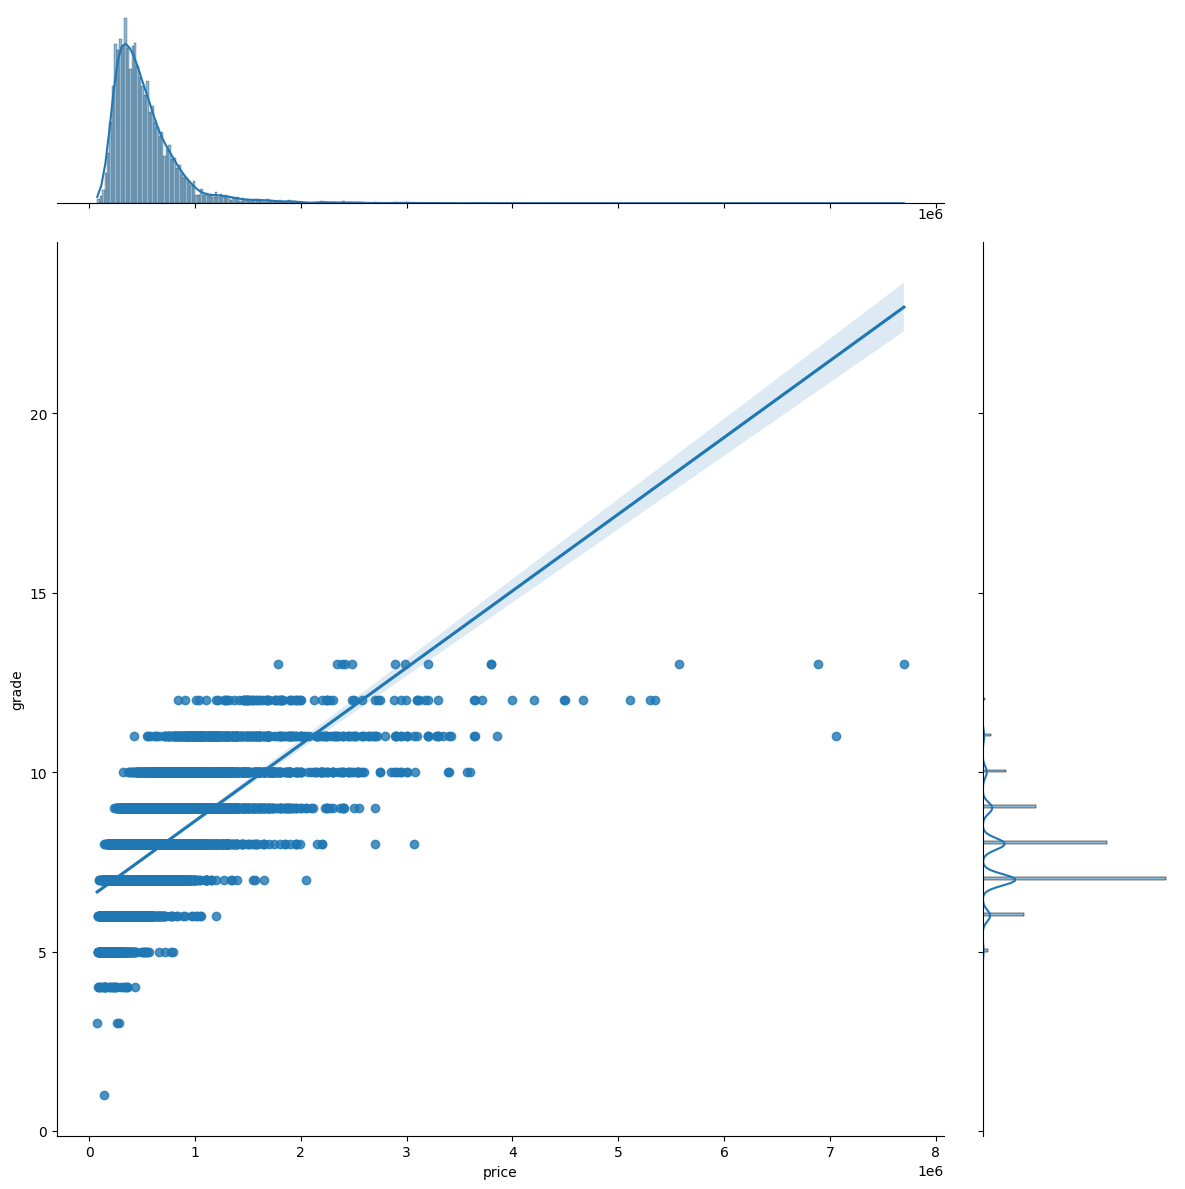

In [23]:
sns.jointplot(x = df['price'], y = df['grade'], kind = 'reg', height=12, ratio=4);

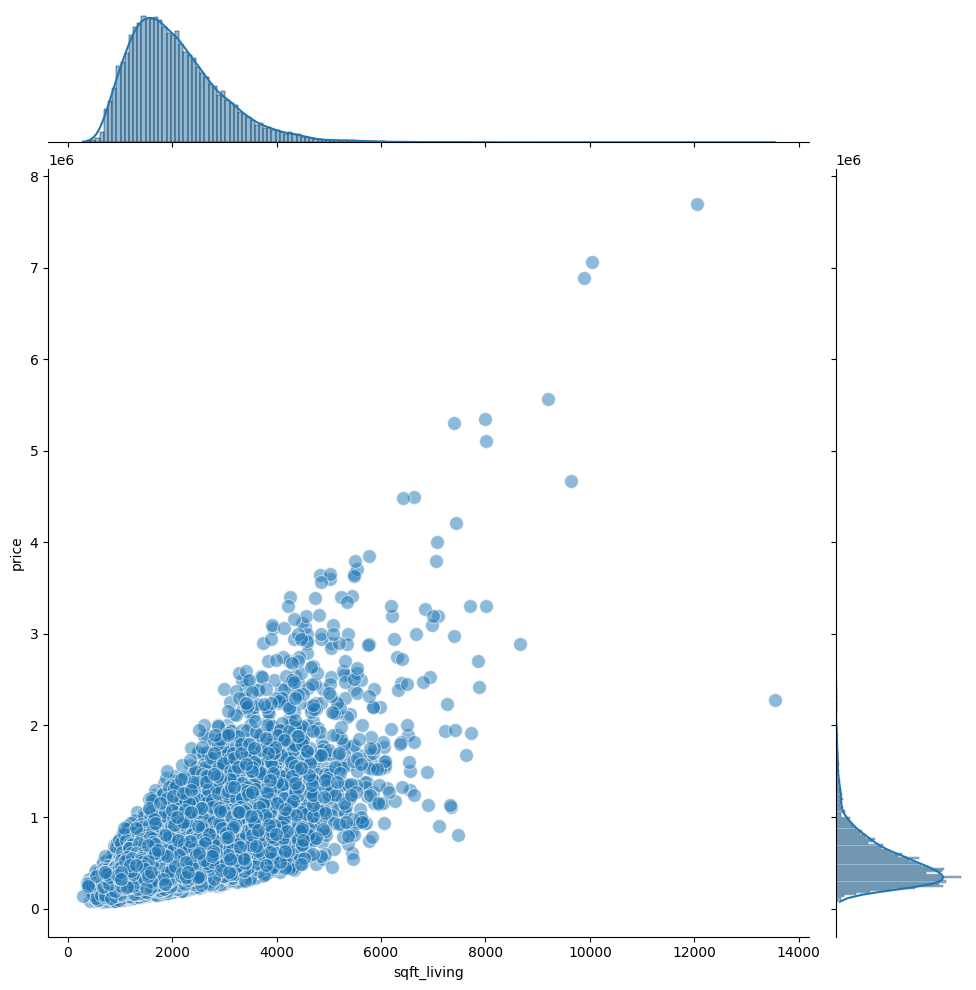

In [24]:
g = sns.JointGrid(data=df, x="sqft_living", y="price",height=10)
g.plot_joint(sns.scatterplot, s=100, alpha=.5)
g.plot_marginals(sns.histplot, kde=True);

In [25]:
data = df.groupby('yr_built')['price'].mean().reset_index()
data

,yr_built,price
0,1900,"581,387.21"
1,1901,"556,935.93"
2,1902,"673,007.41"
3,1903,"480,958.20"
4,1904,"583,756.64"
...,...,...
111,2011,"544,522.00"
112,2012,"527,447.34"
113,2013,"678,545.45"
114,2014,"683,681.75"


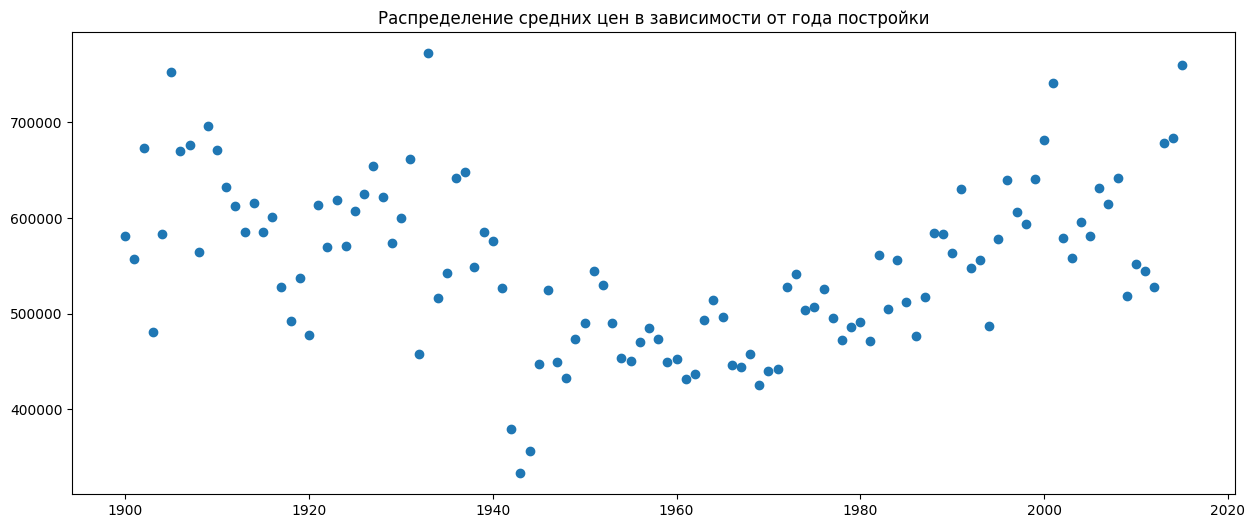

In [26]:
plt.figure(figsize=(15, 6))
plt.scatter(data['yr_built'], data['price'])
plt.title('Распределение средних цен в зависимости от года постройки');

Вывод:

- распределение цены в зависимости от года постройки имеет U-образную форму;
- цена на дома, построенные с 1900-х до 1960-х, постепенно опускалась;
- при этом цена на дома, построенные в 1940-х годах, принимает неожиданно низкие значения;
- цена на дома, построенные с 1960-х годов, вновь начала расти;
- для домов, построенных в 2020-х годах, цена почти такая же, как и для домов, построенных в 1900-х годах.

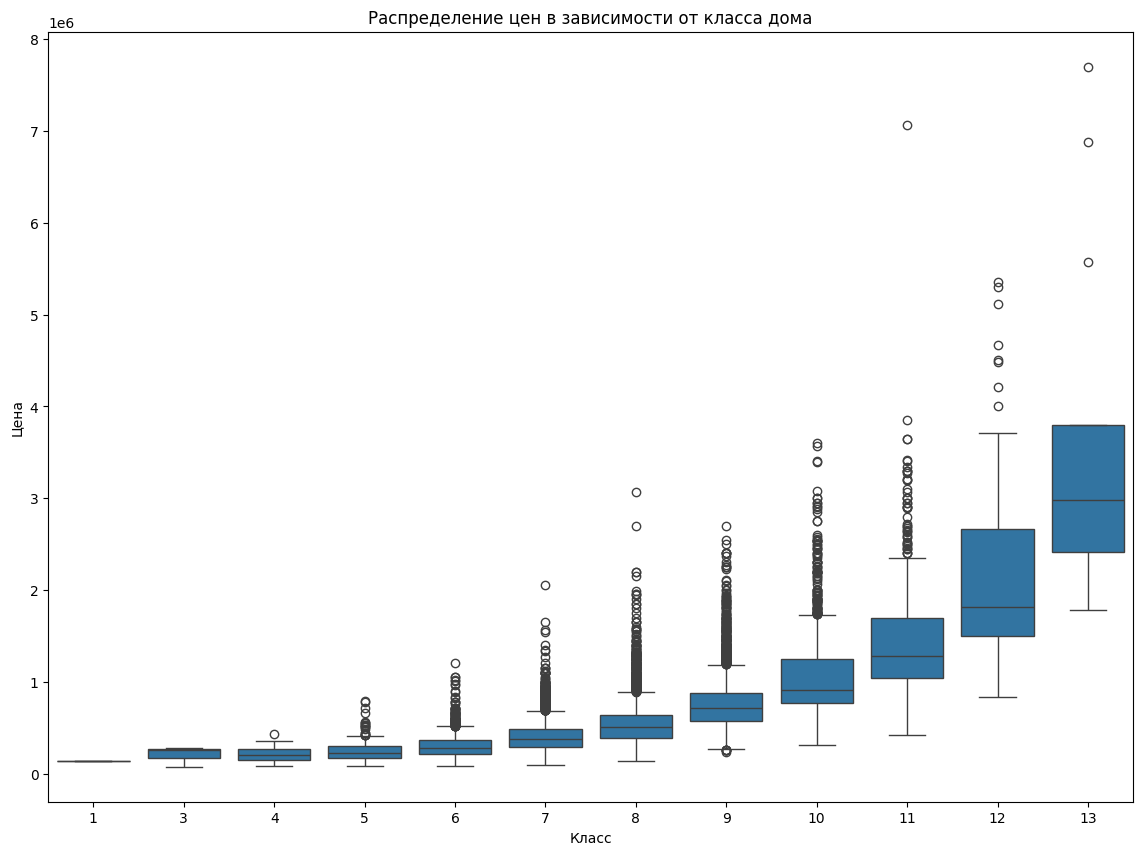

In [27]:
plt.figure(figsize=(14, 10))

sns.boxplot(x=df['grade'], y=df['price'], whis=1.0)

plt.xlabel('Класс')
plt.ylabel('Цена')
plt.title('Распределение цен в зависимости от класса дома');

Вывод:

- с увеличением уровня класса (grade - качество конструкции и дизайна дома) растет разбег по цене;
- для домов с 7-11 классом наблюдается максимальное количество выбросов.

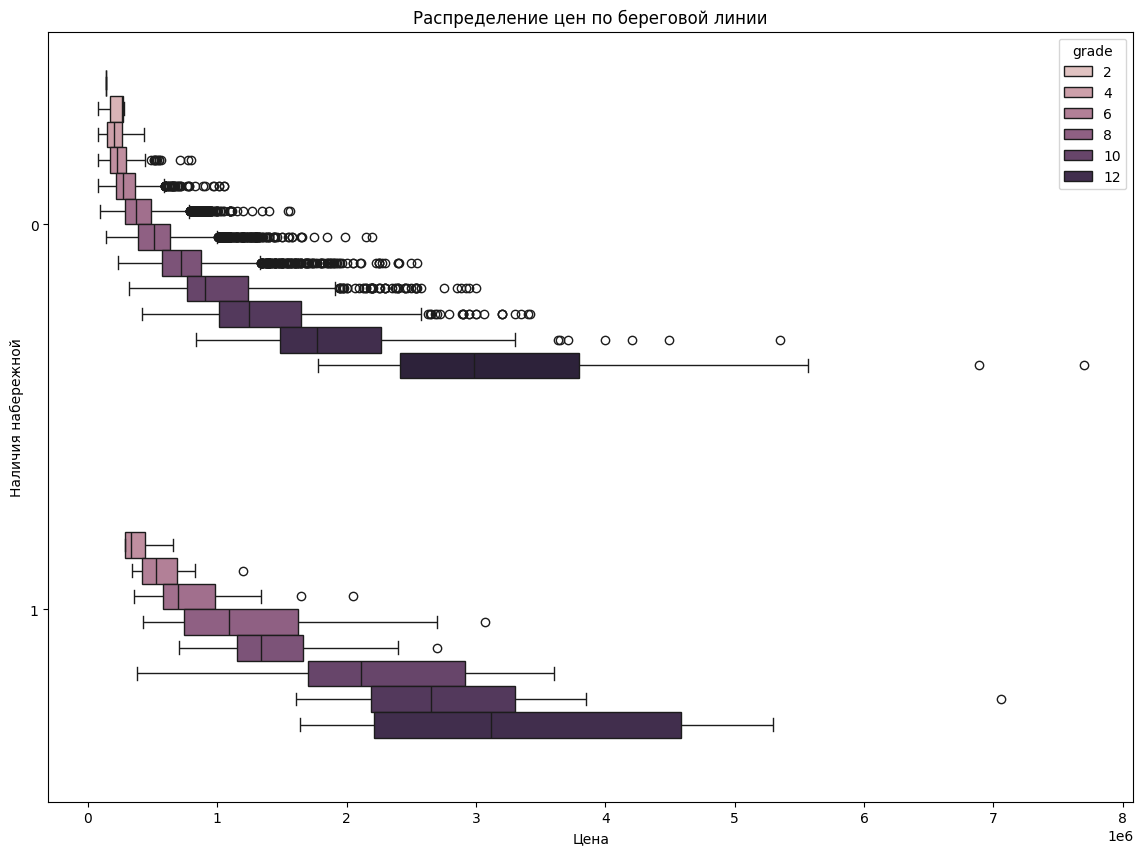

In [28]:
plt.figure(figsize=(14, 10))
sns.boxplot(x=df['price'], y=df['waterfront'].astype('str'), whis=1.5, hue=df['grade'])

plt.title('Распределение цен по береговой линии')
plt.xlabel('Цена')
plt.ylabel('Наличия набережной');

Вывод:

- уровень цен 50% домов, не имеющих набережную, значительно ниже, чем цена 50% домов, имеющих ее;
- для домов без набережной выбросов намного больше;
- разбег цены для домов с набережной больше, чем для домов без нее.

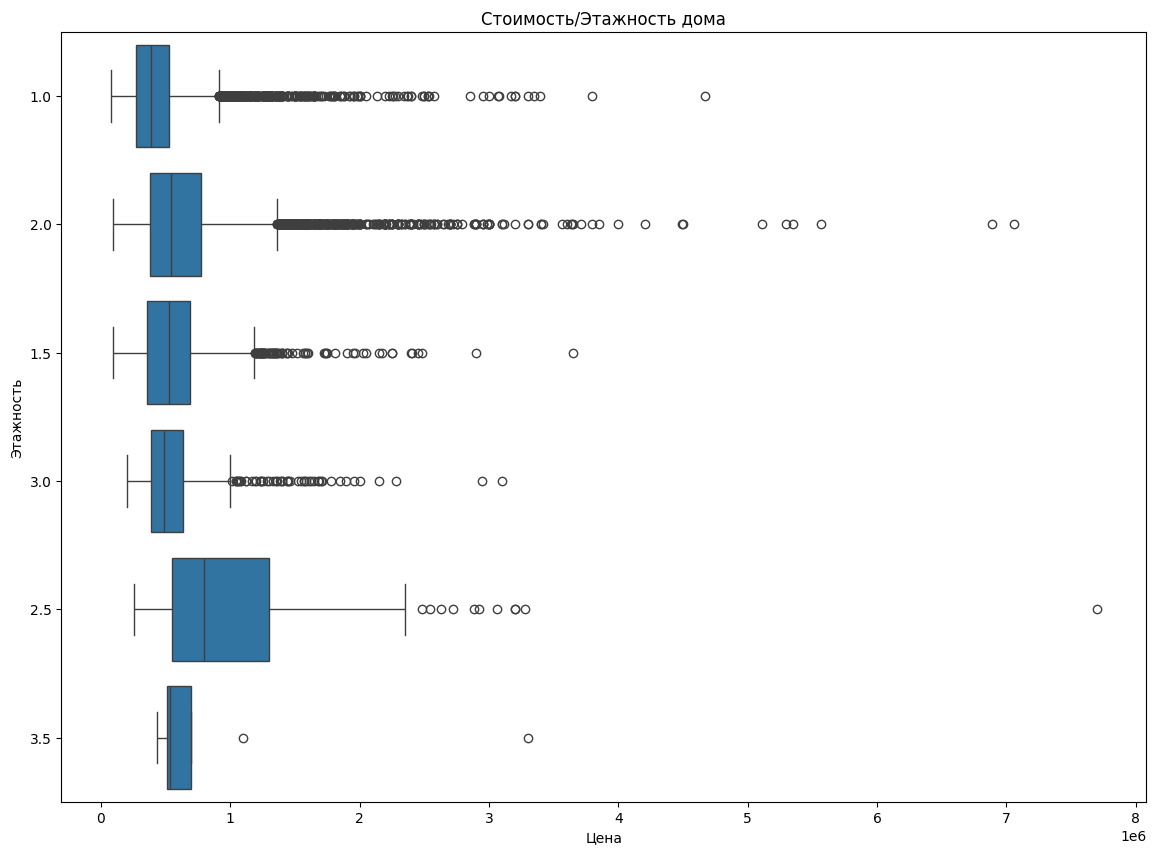

In [29]:
plt.figure(figsize = (14,10))
sns.boxplot(x = df['price'], y = df['floors'].astype('str'), whis = 1.5)
plt.xlabel('Цена')
plt.ylabel('Этажность')
plt.title('Стоимость/Этажность дома');

Вывод:

- наибольший разбег по ценам наблюдается для домов в 2,5 этажей;
- минимальный разбег по ценам наблюдается для домов в 3,5 этажей;
- по 2-этажным домам наблюдается максимальное количество выбросов;
- дома с 3,5 этажами почти не имеют выбросов;
- самый дорогой дом имеет 2,5 этажа и продается почти за 8 000 000 д.е.

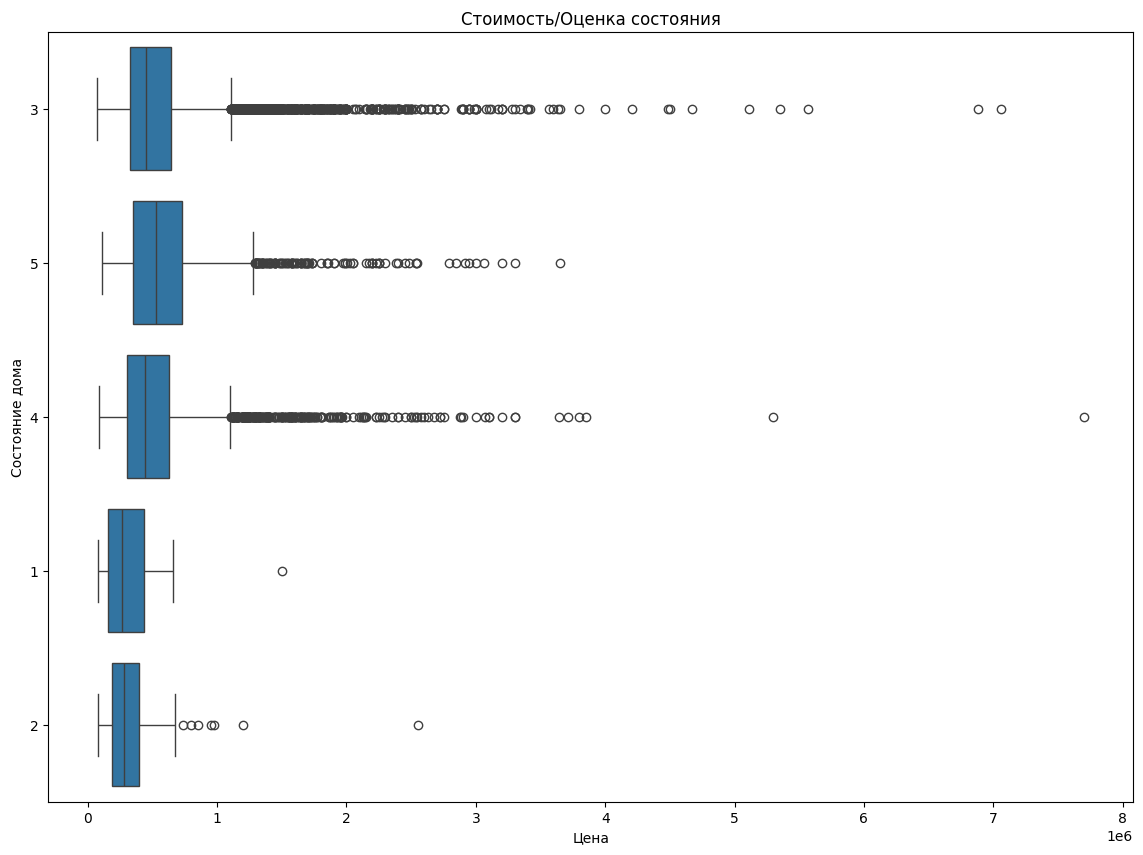

In [30]:
plt.figure(figsize = (14,10))
sns.boxplot(x = df['price'], y = df['condition'].astype('str'), whis = 1.5)
plt.xlabel('Цена')
plt.ylabel('Состояние дома')
plt.title('Стоимость/Оценка состояния');

Вывод:

- дома, состояние которых оценивается в 1 и 2 почти не имеют выбросов;
- по домам с состоянием в 3-4 наблюдаются максимальное количество выбросов;
- для домов с состоянием в 3-5 более 75% наблюдений находится почти на одном и том же уровне цены;
- самый дорогой дом имеет 2,5 этажа с хорошим состоянием и продается почти за 8 000 000 д.е.

Общий вывод:

1. На цену недвижимости больше всего влияют следующие параметры
- жилая площадь;
- качество конструкции и дизайна дома (класс);
- историческая ценность;
2. Большой популярностью пользуются дома на набережной, так как с продаж получается больше выручки.
3. Редко продают дома с 3,5 этажами